In [86]:

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import yeojohnson
warnings.filterwarnings("ignore")

In [87]:

tickers = ["SPINN.HE", "ADMCM.HE", "BETOLAR.HE", "LAPWALL.HE", "TITAN.HE"]



In [88]:

df = yf.download(tickers[1], period='max', multi_level_index=False)
df_backtest = df.copy()
df.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2018-02-09,9.700859,9.827787,9.065317,9.301946,57335
2018-02-12,9.927514,10.000044,9.718991,9.791521,46564
2018-02-13,10.023616,10.027243,9.990978,10.000044,6758
2018-02-14,9.836853,10.027244,9.755257,10.027244,3931
2018-02-15,10.025429,10.027243,9.900315,9.900315,1962


In [89]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [90]:

df["Open_ret"] = df["Open"].diff()
df["Close_ret"] = df["Close"].diff()
df["Volume"] = df["Volume"].diff()

m = df["Close_ret"].mean()
print(m)
std = df["Close_ret"].std()

df["Direction"] = np.where(df["Close_ret"] >= m, 1, 0)
df = df.dropna()


streak_counter = 0
previous_direction = None
df['Streak'] = 0

for i in range(len(df)):
    if df['Direction'].iloc[i] == previous_direction:
        streak_counter += 1
    else: 
        streak_counter = 1

   
    df['Streak'].iloc[i] = streak_counter

    previous_direction = df['Direction'].iloc[i]

df["Last Month return"] = (df["Close"] - df["Close"].shift(22)>0).astype(int)
print(df.shape)
df.head()

0.023555572008627592
(1766, 10)


,Close,High,Low,Open,Volume,Open_ret,Close_ret,Direction,Streak,Last Month return
Date,,,,,,,,,,
2018-02-12,9.927514,10.000044,9.718991,9.791521,-10771.0,0.489575,0.226655,1,1,0
2018-02-13,10.023616,10.027243,9.990978,10.000044,-39806.0,0.208523,0.096102,1,2,0
2018-02-14,9.836853,10.027244,9.755257,10.027244,-2827.0,0.027200,-0.186763,0,1,0
2018-02-15,10.025429,10.027243,9.900315,9.900315,-1969.0,-0.126928,0.188576,1,1,0
2018-02-16,9.981912,10.000044,9.883997,10.000044,8045.0,0.099728,-0.043517,0,1,0


In [91]:

df["Next"] = df["Direction"].shift(-1)
df["Month return"] = df["Close"].shift(-22)-df["Close"]
df["Next Month"] = (df["Month return"]>0).astype(int)
df = df.dropna()
df.head(10)

,Close,High,Low,Open,Volume,Open_ret,Close_ret,Direction,Streak,Last Month return,Next,Month return,Next Month
Date,,,,,,,,,,,,,
2018-02-12,9.927514,10.000044,9.718991,9.791521,-10771.0,0.489575,0.226655,1,1,0,1.0,-0.179511,0
2018-02-13,10.023616,10.027243,9.990978,10.000044,-39806.0,0.208523,0.096102,1,2,0,0.0,-0.248414,0
2018-02-14,9.836853,10.027244,9.755257,10.027244,-2827.0,0.027200,-0.186763,0,1,0,1.0,-0.045331,0
2018-02-15,10.025429,10.027243,9.900315,9.900315,-1969.0,-0.126928,0.188576,1,1,0,0.0,-0.213964,0
2018-02-16,9.981912,10.000044,9.883997,10.000044,8045.0,0.099728,-0.043517,0,1,0,0.0,-0.141433,0
2018-02-19,9.974658,10.009110,9.972845,9.972845,-9464.0,-0.027199,-0.007254,0,2,0,0.0,-0.010879,0
2018-02-20,9.945646,10.000043,9.927513,10.000043,2138.0,0.027198,-0.029012,0,3,0,1.0,-0.106981,0
2018-02-21,10.009110,10.009110,9.945647,9.945647,-2149.0,-0.054396,0.063464,1,1,0,0.0,-0.045331,0
2018-02-22,9.737123,9.965592,9.700859,9.947460,4286.0,0.001813,-0.271987,0,1,0,1.0,0.172258,1


In [92]:
df["Movement"] = ((df["High"] - df["Low"])/df["High"])**3

In [93]:
df_lags = df[["Open_ret", "Close_ret", "Volume","Movement"]].shift([1,2,3])
df = pd.concat([df, df_lags], axis=1)
df = df.dropna()
df.head()

,Close,High,Low,Open,Volume,Open_ret,Close_ret,Direction,Streak,Last Month return,...,Volume_1,Movement_1,Open_ret_2,Close_ret_2,Volume_2,Movement_2,Open_ret_3,Close_ret_3,Volume_3,Movement_3
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-15,10.025429,10.027243,9.900315,9.900315,-1969.0,-0.126928,0.188576,1,1,0,...,-2827.0,1.995718e-05,0.208523,0.096102,-39806.0,4.730568e-08,0.489575,0.226655,-10771.0,2.220017e-05
2018-02-16,9.981912,10.000044,9.883997,10.000044,8045.0,0.099728,-0.043517,0,1,0,...,-1969.0,2.028252e-06,0.027200,-0.186763,-2827.0,1.995718e-05,0.208523,0.096102,-39806.0,4.730568e-08
2018-02-19,9.974658,10.009110,9.972845,9.972845,-9464.0,-0.027199,-0.007254,0,2,0,...,8045.0,1.562775e-06,-0.126928,0.188576,-1969.0,2.028252e-06,0.027200,-0.186763,-2827.0,1.995718e-05
2018-02-20,9.945646,10.000043,9.927513,10.000043,2138.0,0.027198,-0.029012,0,3,0,...,-9464.0,4.756325e-08,0.099728,-0.043517,8045.0,1.562775e-06,-0.126928,0.188576,-1969.0,2.028252e-06
2018-02-21,10.009110,10.009110,9.945647,9.945647,-2149.0,-0.054396,0.063464,1,1,0,...,2138.0,3.815419e-07,-0.027199,-0.007254,-9464.0,4.756325e-08,0.099728,-0.043517,8045.0,1.562775e-06


In [94]:
df["MA120"] = df["Close_ret"].rolling(120, min_periods=30).mean()
df["MAX_RANGE"] = df["Close"].rolling(250, min_periods=30).max()
df["MIN_RANGE"] = df["Close"].rolling(250, min_periods=30).min()

df["%Range_Max"] = df["Close"] / (df["MAX_RANGE"]+0.001)
df["%Range_Min"] = df["Close"] / (df["MIN_RANGE"]+0.001)

df["MA120_V"] = df["Volume"].rolling(120, min_periods=30).mean()
df["MAX_RANGE_V"] = df["Volume"].rolling(250, min_periods=30).max()
df["MIN_RANGE_V"] = df["Volume"].rolling(250, min_periods=30).min()

df["%Range_Max"] = df["Close"] / (df["MAX_RANGE"]+0.001)
df["%Range_Min"] = df["Close"] / (df["MIN_RANGE"]+0.001)

df["%Range_Max_V"] = df["Volume"] / (df["MAX_RANGE_V"]+0.001)
df["%Range_Min_V"] = df["Volume"] / (df["MIN_RANGE_V"]+0.001)

df["MA120_V"] = df["Volume"].rolling(120, min_periods=30).mean()
df["MAX_RANGE_V"] = df["Volume"].rolling(250, min_periods=30).max()
df["MIN_RANGE_V"] = df["Volume"].rolling(250, min_periods=30).min()

df["%Range_Max"] = df["Close"] / (df["MAX_RANGE"]+0.001)
df["%Range_Min"] = df["Close"] / (df["MIN_RANGE"]+0.001)

df["%Range_Max_V"] = df["Volume"] / (df["MAX_RANGE_V"]+0.001)
df["%Range_Min_V"] = df["Volume"] / (df["MIN_RANGE_V"]+0.001)

df["MA_Streak"] = df["Streak"].rolling(22).mean()
df = df.drop(["MAX_RANGE", "MIN_RANGE","MAX_RANGE_V", "MIN_RANGE_V"], axis=1)


Text(0, 0.5, 'Close')

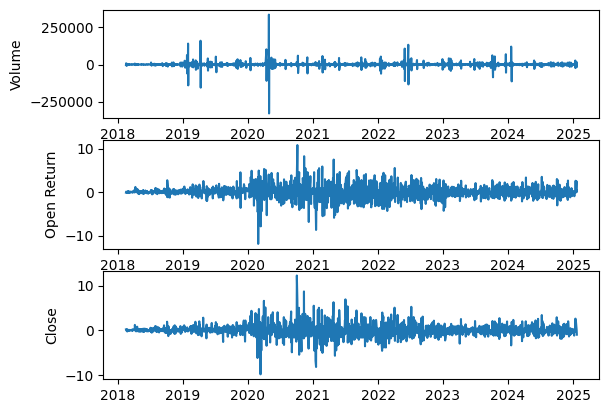

In [95]:

fig, ax = plt.subplots(3, 1)
ax[0].plot(df.index, df["Volume"], label="Volume")
ax[0].set_ylabel("Volume")
ax[1].plot(df.index, df["Open_ret"],label="Open")
ax[1].set_ylabel("Open Return")
ax[2].plot(df.index, df["Close_ret"], label="Close")
ax[2].set_ylabel("Close")


In [96]:
df.head()

,Close,High,Low,Open,Volume,Open_ret,Close_ret,Direction,Streak,Last Month return,...,Close_ret_3,Volume_3,Movement_3,MA120,%Range_Max,%Range_Min,MA120_V,%Range_Max_V,%Range_Min_V,MA_Streak
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-15,10.025429,10.027243,9.900315,9.900315,-1969.0,-0.126928,0.188576,1,1,0,...,0.226655,-10771.0,2.220017e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-16,9.981912,10.000044,9.883997,10.000044,8045.0,0.099728,-0.043517,0,1,0,...,0.096102,-39806.0,4.730568e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-19,9.974658,10.009110,9.972845,9.972845,-9464.0,-0.027199,-0.007254,0,2,0,...,-0.186763,-2827.0,1.995718e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-20,9.945646,10.000043,9.927513,10.000043,2138.0,0.027198,-0.029012,0,3,0,...,0.188576,-1969.0,2.028252e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21,10.009110,10.009110,9.945647,9.945647,-2149.0,-0.054396,0.063464,1,1,0,...,-0.043517,8045.0,1.562775e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


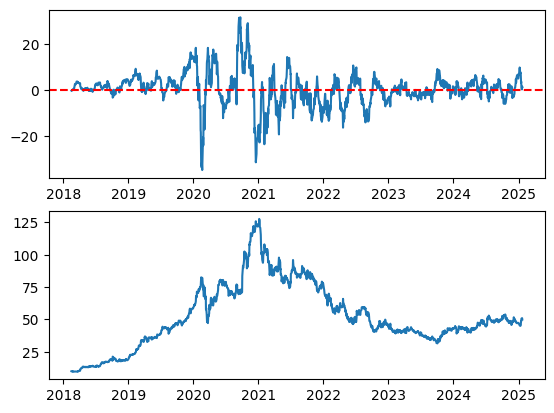

In [97]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(df.index, df["Month return"])
ax1.axhline(y=0, color='red', linestyle='--')

ax2.plot(df.index, df["Close"])



In [98]:
df.describe()

,Close,High,Low,Open,Volume,Open_ret,Close_ret,Direction,Streak,Last Month return,...,Close_ret_3,Volume_3,Movement_3,MA120,%Range_Max,%Range_Min,MA120_V,%Range_Max_V,%Range_Min_V,MA_Streak
count,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,...,1741.000000,1741.000000,1741.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1720.000000
mean,52.207965,53.159921,51.139253,52.253707,-0.265365,0.023534,0.023069,0.470994,1.914991,0.549110,...,0.023492,-31.091901,0.000111,0.024068,0.811890,1.652608,-0.179626,-0.000311,-0.005112,1.919503
std,24.438176,24.992058,23.826501,24.503872,18714.381869,1.573404,1.421697,0.499301,1.327737,0.497725,...,1.421475,18730.850937,0.000334,0.135080,0.165108,0.638516,165.371500,0.190610,0.228796,0.442163
min,9.737123,9.791521,9.621077,9.621077,-329204.000000,-11.891795,-9.879337,0.000000,1.000000,0.000000,...,-9.879337,-329204.000000,0.000000,-0.417921,0.472067,0.999968,-2783.658333,-1.399544,-3.052517,1.272727
25%,39.250469,40.037443,38.365116,39.348839,-2120.000000,-0.667739,-0.543972,0.000000,1.000000,0.000000,...,-0.543972,-2130.000000,0.000009,-0.050491,0.642569,1.134579,-28.856982,-0.022989,-0.021431,1.636364
50%,47.450001,48.232304,46.550869,47.409390,-38.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,-39.000000,0.000030,0.038698,0.864735,1.389972,-0.491667,-0.000397,0.000368,1.818182
75%,69.338326,71.002793,67.874709,69.338324,2011.000000,0.725294,0.572350,1.000000,2.000000,1.000000,...,0.572350,2009.000000,0.000088,0.101496,0.973013,2.012175,23.064583,0.021584,0.022939,2.090909
max,127.608109,144.531046,125.778600,127.608107,335551.000000,10.794104,12.257698,1.000000,11.000000,1.000000,...,12.257698,335551.000000,0.006451,0.466524,0.999992,3.481836,2820.433333,1.000000,1.000000,3.954545


In [99]:
df_backtest = df.copy()
df = df.drop(["Open", "High", "Low", "Close", "Close"], axis=1)

In [100]:
df.head()

,Volume,Open_ret,Close_ret,Direction,Streak,Last Month return,Next,Month return,Next Month,Movement,...,Close_ret_3,Volume_3,Movement_3,MA120,%Range_Max,%Range_Min,MA120_V,%Range_Max_V,%Range_Min_V,MA_Streak
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-15,-1969.0,-0.126928,0.188576,1,1,0,0.0,-0.213964,0,2.028252e-06,...,0.226655,-10771.0,2.220017e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-16,8045.0,0.099728,-0.043517,0,1,0,0.0,-0.141433,0,1.562775e-06,...,0.096102,-39806.0,4.730568e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-19,-9464.0,-0.027199,-0.007254,0,2,0,0.0,-0.010879,0,4.756325e-08,...,-0.186763,-2827.0,1.995718e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-20,2138.0,0.027198,-0.029012,0,3,0,1.0,-0.106981,0,3.815419e-07,...,0.188576,-1969.0,2.028252e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21,-2149.0,-0.054396,0.063464,1,1,0,0.0,-0.045331,0,2.549067e-07,...,-0.043517,8045.0,1.562775e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_curve, auc, confusion_matrix,classification_report

In [ ]:
folds = 1
tscv = TimeSeriesSplit(n_splits=folds)#Chose not to do more complicated time series split, we will only evaluate the second split
features = df.drop(["Next", "Next Month", "Month return"], axis=1)
target = df['Next Month']

outcomes = []

In [103]:
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [5,6, 7],
    'learning_rate': [0.001, 0.01, 0.05],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6,0.7, 0.8],
    'gamma': [0.1, 0.2,0.3]
}
model = XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='precision',
        cv=5,
        verbose=1
)

In [104]:
for i, (train_index, test_index) in enumerate(tscv.split(df)):

    train_features = features.iloc[train_index]
    test_features = features.iloc[test_index]

    train_target = target.iloc[train_index]
    test_target = target.iloc[test_index]

    train_dates = df.index[train_index]
    test_dates = df.index[test_index]


    
    
    grid_search.fit(train_features, train_target)
    model = grid_search.best_estimator_

    pred_target_proba = model.predict_proba(test_features)[:, 1]
    pred_target_bi = model.predict(test_features)

    best_params = grid_search.best_params_

    print("Best Parameters:", best_params)

    outcomes.append((test_target, pred_target_bi, pred_target_proba))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Fitting 5 folds for each of 729 candidates, totalling 3645 fits


KeyboardInterrupt: 

<Axes: >

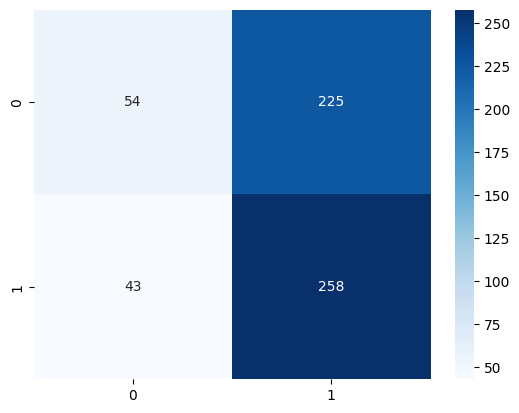

In [105]:
cm = confusion_matrix(test_target, pred_target_bi)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Text(0, 0.5, 'True Positive Rate')

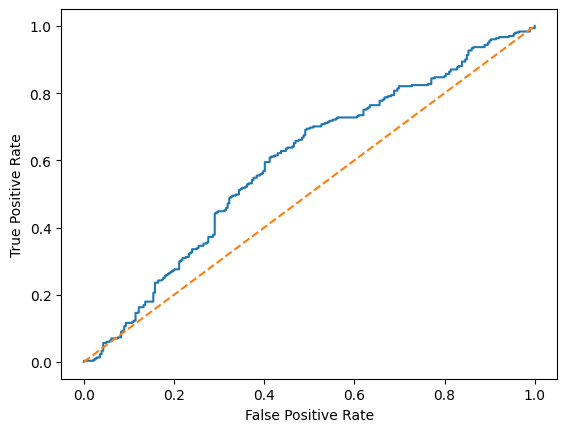

In [106]:
fpr, tpr, thresholds = roc_curve(test_target, pred_target_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [107]:
true_n = np.sum(fpr <= 0.05)
true_n

false_n = np.sum(tpr >= 0.50)
false_n

157

In [108]:
true_treshold = thresholds[true_n]
false_treshold = thresholds[-false_n]
false_treshold

0.99457645

In [109]:
print(classification_report(test_target, pred_target_bi))

              precision    recall  f1-score   support

           0       0.56      0.19      0.29       279
           1       0.53      0.86      0.66       301

    accuracy                           0.54       580
   macro avg       0.55      0.53      0.47       580
weighted avg       0.55      0.54      0.48       580



In [110]:
df[["Next Month", "Next"]].value_counts()

Next Month  Next
1           1.0     509
            0.0     469
0           0.0     452
            1.0     311
Name: count, dtype: int64

(array([ 10.,  15.,   5.,  10.,  14.,   6.,   0.,   8.,   3.,   4.,   0.,
          1.,   3.,   3.,   1.,   1.,   2.,   2.,   2.,   0.,   0.,   2.,
          1.,   2.,   2.,   1.,   1.,   3.,   2.,   4.,   1.,   2.,   0.,
          3.,   1.,   2.,   0.,   1.,   3.,   1.,   2.,   1.,   1.,   3.,
          2.,   1.,   1.,  14.,  33., 400.]),
 array([0.01088476, 0.03064213, 0.05039949, 0.07015686, 0.08991423,
        0.10967159, 0.12942895, 0.14918633, 0.16894369, 0.18870106,
        0.20845842, 0.22821578, 0.24797316, 0.26773053, 0.28748789,
        0.30724525, 0.32700261, 0.34675997, 0.36651736, 0.38627473,
        0.40603209, 0.42578945, 0.44554681, 0.4653042 , 0.48506156,
        0.50481892, 0.52457631, 0.54433364, 0.56409103, 0.58384836,
        0.60360575, 0.62336314, 0.64312047, 0.66287786, 0.68263519,
        0.70239258, 0.72214997, 0.7419073 , 0.76166469, 0.78142202,
        0.80117941, 0.8209368 , 0.84069413, 0.86045152, 0.88020885,
        0.89996624, 0.91972363, 0.93948096, 0.

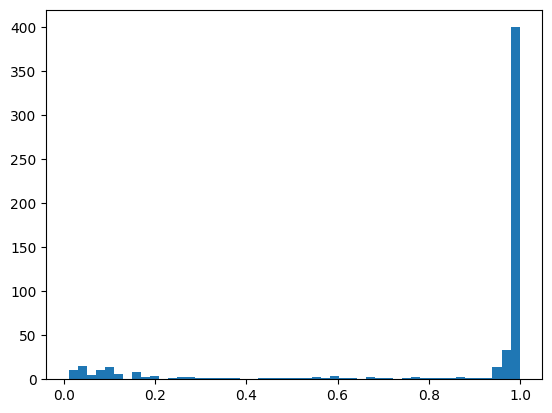

In [111]:
plt.hist(pred_target_proba, bins=50)

In [120]:
df_action['effect'] = abs(df_action["Propability"]-0.5)

In [113]:
df_action = pd.DataFrame(pred_target_proba, index=test_dates, columns=["Propability"])

print(true_treshold, false_treshold)

df_action["Action"] = np.where(df_action["Propability"] > true_treshold, 1, 
                                np.where(df_action["Propability"] < false_treshold, -1, 0))


df_action.value_counts("Action")

0.9976598 0.99457645


Action
-1    330
 0    220
 1     30
Name: count, dtype: int64

In [121]:
df_backtest = df_backtest.merge(df_action, left_index=True, right_index=True, how="inner")

In [122]:
df_backtest

,Close,High,Low,Open,Volume,Open_ret,Close_ret,Direction,Streak,Last Month return,...,%Range_Min,MA120_V,%Range_Max_V,%Range_Min_V,MA_Streak,Propability_x,Action_x,Propability_y,Action_y,effect
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-30,44.786133,44.833828,43.784527,43.784527,-325.0,-1.049301,1.001606,1,1,0,...,1.022852,17.866667,-0.002448,0.002425,3.590909,0.049874,-1,0.049874,-1,0.450126
2022-10-03,44.833832,45.263093,44.166093,44.786137,875.0,1.001610,0.047699,1,2,0,...,1.023942,16.683333,0.006592,-0.006529,3.636364,0.197730,-1,0.197730,-1,0.302270
2022-10-04,44.070702,45.263091,43.164485,45.263091,10738.0,0.476954,-0.763130,0,1,0,...,1.006513,106.341667,0.080897,-0.080121,3.636364,0.097933,-1,0.097933,-1,0.402067
2022-10-05,42.353661,44.070700,41.972095,44.070700,-8987.0,-1.192391,-1.717041,0,2,0,...,0.999976,-3.125000,-0.067706,0.067056,3.681818,0.172464,-1,0.172464,-1,0.327536
2022-10-06,42.210571,43.307571,41.876704,42.353659,713.0,-1.717041,-0.143089,0,3,0,...,0.999976,54.483333,0.005372,-0.005320,3.772727,0.474656,-1,0.474656,-1,0.025344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-16,48.700001,49.549999,47.349998,48.049999,-14789.0,0.049999,-0.200001,0,1,0,...,1.243835,12.691667,-0.122901,0.130240,1.636364,0.997898,1,0.997898,1,0.497898
2025-01-17,50.599998,50.900002,48.099998,48.099998,844.0,0.049999,1.899998,1,1,1,...,1.292363,18.075000,0.007014,-0.007433,1.590909,0.997468,0,0.997468,0,0.497468
2025-01-20,51.000000,52.000000,49.349998,50.599998,17701.0,2.500000,0.400002,1,2,1,...,1.302579,157.316667,0.147100,-0.155885,1.636364,0.997453,0,0.997453,0,0.497453


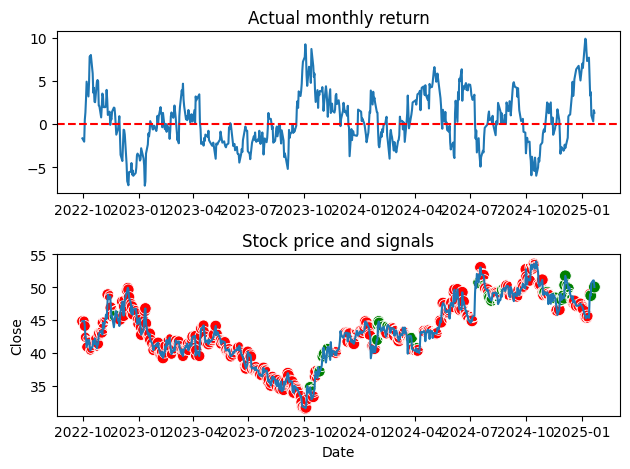

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(df_backtest.index, df_backtest["Month return"])
ax1.set_title("Actual monthly return")
ax1.axhline(y=0, color='red', linestyle='--')

ax2.plot(df_backtest.index, df_backtest["Close"])
ax2.set_title("Stock price and signals")
sns.scatterplot(data=df_backtest, x=df_backtest.index, y="Close", hue="Action",
                palette={1: 'green', -1: "red"}, ax=ax2, legend=False, size='effect')
plt.tight_layout()